In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

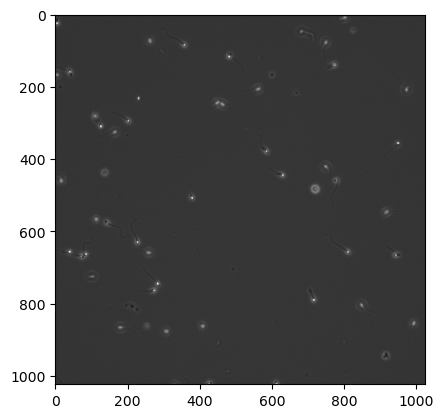

In [3]:
videofile = "ExampleVideos/20X Ph 149Fps Wash Dil 1 1 P017me R1.mp4"
#videofile = "ExampleVideos/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

53.0


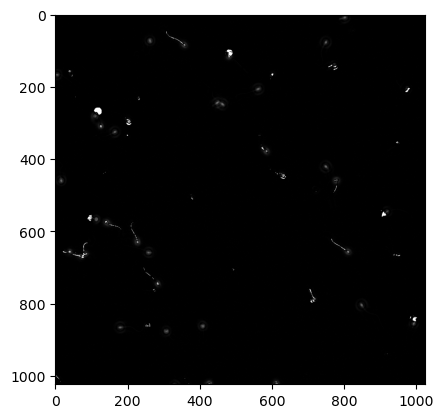

In [17]:
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
print(np.median(frames[0]))
#plt.imshow(255-frames[0],cmap='gray');plt.show()
#frames = utils.medianFilter(frames,perFrame=False)
frames = utils.positivePhaseFilter(frames)
plt.imshow(frames[0],cmap='gray');plt.show()

utils.saveVideo(frames,'median.mp4')


In [ ]:
importlib.reload(tracker)

f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

In [6]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

100%|██████████| 250/250 [02:59<00:00,  1.39it/s]


            y           x         mass      size       ecc      signal  \
0    9.263716  801.391002  1388.983259  2.620051  0.246468   51.820151   
1  545.880170  919.235949   958.164750  2.617645  0.222510   38.103052   
2  567.690769  114.004001  1777.634391  3.242685  0.071890   37.086971   
3  578.124201  144.284932   556.304561  2.701598  0.233896   41.659337   
4  630.699391  228.072106  1500.752212  1.869562  0.061360  107.704627   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    4636.0  0.005681      0      0   126     786       6      24      10   
1    2799.0  0.009498      0      1    53     913     541      11       9   
2    5486.0  0.004790      0      2    90     109     562      10      12   
3    2517.0  0.010590      0      3    16     142     576       5       4   
4    5033.0  0.005227      0      4   189     220     617      16      23   

                                        segmentation  
0  [[6, 800], [6, 801], [6, 802], [6,

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.calcAverageSpeed(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [10]:
importlib.reload(visualizer)

#visualizer.runVisualization(videofile, final, visualization="segments")
visualizer.runVisualization(videofile, final, visualization="segments", savefile="output_segments.mp4")

(111, 3)
Video Finished.
